<a href="https://colab.research.google.com/github/ednavivianasegura/ERAP_Curso_R/blob/main/ERAP_R_Course_Modulo_IV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Título: Manipulación de datos con R - Módulo IV (Exploración de datos y Estadística descriptiva)

Autor(es): Edna Viviana Segura Alvarado - Hans Mauricio Carrillo Hernández

Fecha: 2025-06

Institución: Universidad de La Rioja

# Estadística Descriptiva

La estadística descriptiva se encarga de recolectar, organizar, representar y resumir la información contenida en un conjunto de datos. Su objetivo es **describir las características fundamentales** de una o más variables, sin llegar a realizar inferencias o generalizaciones.

---

## Clasificación de las variables

| Tipo de variable     | Subtipo              | Ejemplo                            |
|----------------------|----------------------|------------------------------------|
| **Cualitativa**      | Nominal              | Sexo (masculino/femenino)         |
|                      | Ordinal              | Nivel educativo (bajo/medio/alto) |
| **Cuantitativa**     | Discreta             | Número de hijos (0, 1, 2…)         |
|                      | Continua             | Edad, ingreso mensual, peso       |

---

### Enfoque de análisis:

| Enfoque           | Descripción |
|-------------------|-------------|
| **Univariado**    | Análisis de una sola variable. Se explora su distribución, tendencia central, dispersión y forma. |
| **Bivariado**     | Análisis conjunto de dos variables para identificar relaciones o asociaciones. |
| *(Multivariado)*  | Análisis simultáneo de tres o más variables (fuera del alcance de esta sección). |

---

## Estadística Descriptiva Univariada

1. Para Variables **Cualitativas**:

Se resumen usando tablas de frecuencia:

- **Frecuencia absoluta**: número de observaciones por categoría.
- **Frecuencia relativa**: proporción (o porcentaje) respecto al total.
- **Representaciones gráficas**: gráfico de barras, gráfico de torta.

2. Para Variables **Cuantitativas**:

Se utilizan:

- **Medidas de tendencia central**: media, mediana, moda.
- **Medidas de dispersión**: rango, varianza, desviación estándar, coeficiente de variación.
- **Medidas de forma**: asimetría (skewness), curtosis (kurtosis).
- **Visualizaciones**: histogramas, diagramas de caja (boxplots), Q-Q plots.

---

## Estadística Descriptiva Bivariada

1. Dos Variables cualitativas:
- Tablas de contingencia
- Gráficos de mosaico o de barras agrupadas
- Medidas de asociación (por ejemplo, prueba Chi²)

2. Una Variable Cualitativa y una Cuantitativa:
- Promedios o medianas por grupo
- Boxplots por categoría
- ANOVA exploratoria

3. Dos Variables Cuantitativas:
- Nube de puntos (scatterplot)
- Coeficiente de correlación (Pearson, Spearman)
- Covarianza
- Recta de regresión simple

---



In [44]:
# @title Librerías
# Paquetes necesarios

# Función para instalar si no está instalado
instalar_si_no <- function(paquete) {
    if (!requireNamespace(paquete, quietly = TRUE)) {
    install.packages(paquete, repos = "https://cloud.r-project.org")
  }
  library(paquete, character.only = TRUE)
}

# Lista de paquetes a verificar
paquetes <- c("mlbench","forcats","VIM","knitr","e1071","tidyr","dplyr","ggplot2","e1071", "visdat","reshape2", "janitor")


# Instalar y cargar todos
invisible(lapply(paquetes, instalar_si_no))

# Instalar librería empire
remotes::install_github("davidbiol/empire")



iterators (NA -> 1.0.14 ) [CRAN]
shape     (NA -> 1.4.6.1) [CRAN]
foreach   (NA -> 1.5.2  ) [CRAN]
glmnet    (NA -> 4.1-9  ) [CRAN]


Installing 4 packages: iterators, shape, foreach, glmnet

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/Rtmp6aJ1rL/remotesba4bb3b2fb/davidbiol-empire-af6dc96/DESCRIPTION’ ... OK
* preparing ‘empire’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘empire_0.1.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Datos

Utilizaremos nuevamente el conjunto Sleep de la librería VIM trabajado durante el módulo II.



In [11]:
# Cargar dataset 'sleep'
data("sleep")
sleep

BodyWgt,BrainWgt,NonD,Dream,Sleep,Span,Gest,Pred,Exp,Danger
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
6654.000,5712.0,NA,NA,3.3,38.6,645,3,5,3
1.000,6.6,6.3,2.0,8.3,4.5,42,3,1,3
3.385,44.5,NA,NA,12.5,14.0,60,1,1,1
0.920,5.7,NA,NA,16.5,NA,25,5,2,3
2547.000,4603.0,2.1,1.8,3.9,69.0,624,3,5,4
10.550,179.5,9.1,0.7,9.8,27.0,180,4,4,4
0.023,0.3,15.8,3.9,19.7,19.0,35,1,1,1
160.000,169.0,5.2,1.0,6.2,30.4,392,4,5,4
3.300,25.6,10.9,3.6,14.5,28.0,63,1,2,1


## Análisis univariado:


### Medidas de Tendencia Central, posición y coeficiente de variación:

Utilizaremos la función summarise de dplyr para encontrar las medidas de tendencia central y de posición de la variable **BodyWgt**, que no tiene datos faltantes:



In [12]:
# Solo seleccionamos variables numéricas y eliminamos NAs (aunque de antemanos sabemos que no tiene NAs)
sleep_limpio_BodyWgt <- sleep %>%
  select_if(is.numeric)%>%
  filter(!is.na(BodyWgt))


In [13]:
View(sleep_limpio_BodyWgt)

BodyWgt,BrainWgt,NonD,Dream,Sleep,Span,Gest,Pred,Exp,Danger
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
6654.000,5712.0,NA,NA,3.3,38.6,645,3,5,3
1.000,6.6,6.3,2.0,8.3,4.5,42,3,1,3
3.385,44.5,NA,NA,12.5,14.0,60,1,1,1
0.920,5.7,NA,NA,16.5,NA,25,5,2,3
2547.000,4603.0,2.1,1.8,3.9,69.0,624,3,5,4
10.550,179.5,9.1,0.7,9.8,27.0,180,4,4,4
0.023,0.3,15.8,3.9,19.7,19.0,35,1,1,1
160.000,169.0,5.2,1.0,6.2,30.4,392,4,5,4
3.300,25.6,10.9,3.6,14.5,28.0,63,1,2,1


In [23]:
# Calcular resumen estadístico de la variable BodyWgt
(tabla_resultados1<- sleep_limpio_BodyWgt%>%
  summarise(
  #medidas de tendencia central
  media = mean(BodyWgt), #promedio
  mediana = median(BodyWgt), #mediana

  #medidas de dispersión
  varianza = var(BodyWgt), #varianza
  desviacion = sd(BodyWgt), #desviación
  minimo = min(BodyWgt), #mínimo
  maximo = max(BodyWgt), #máximo
  rango = maximo - minimo, #rango

  #Coeficiente de variación:
  coef_variacion = (desviacion / media)*100, #cv

  #Medidas de posición
  iqr = IQR(BodyWgt), #rango intercuartílico
  q1 = quantile(BodyWgt, 0.25), # primer cuartil (25%)
  q3 = quantile(BodyWgt, 0.75), # tercer cuartil (75%)
  p90 = quantile(BodyWgt, 0.90), # percentil (90%)
  LI =q1 - 1.5*iqr, # limite inferior.
  LS= q3 + 1.5*iqr, # límite superior.
  #COnteo de valores atípicos:
  total =n(), #cuenta el número de observaciones
  outliers = sum(BodyWgt < LI |BodyWgt > LS), # contar el número de valores atípicos
  proporcion_outliers = outliers / total, # proporción de datos atípicos

  #forma de la distribución:
  asimetria = skewness(BodyWgt), # asimetría
  curtosis = kurtosis(BodyWgt)
  )%>%
    #tranformación de la tabla (convirtiendo filas a columnas)
  pivot_longer(
    cols = everything(),
    names_to = "Estadístico",
    values_to = "Valor"
  )%>%
    #redondear los valores a 2 decimales y eliminamos al notación científica
  mutate(
    Valor = format(round(Valor,2), scientific = FALSE)))


Estadístico,Valor
<chr>,<chr>
media,198.79
mediana,3.34
varianza,808485.13
desviacion,899.16
minimo,0.00
maximo,6654.00
rango,6654.00
coef_variacion,452.32
iqr,47.60


In [24]:
# Calcular moda con count y slice_max
sleep_limpio_BodyWgt%>%
  count(BodyWgt) %>% #con esto creamos una variable llamada "n", que representa el número de observaciones
  arrange(desc(n))%>%
  slice(1)


BodyWgt,n
<dbl>,<int>
0.023,2


¿Qué nos dicen estos valores?:

| Estadístico                     | Valor      | Interpretación                                                                                                                          |
| ------------------------------- | ---------- | --------------------------------------------------------------------------------------------------------------------------------------- |
| **media**                       | 198.79     | El peso promedio es muy alto, pero está distorsionado por valores extremos (como elefantes o ballenas).                                 |
| **mediana**                     | 3.34       | El valor central realista: la mitad de los animales pesa menos de 3.34 kg. Mucho menor que la media → **asimetría positiva**.           |
| **varianza**                    | 808485.13  | Muestra una altísima dispersión de los pesos. Valores grandes como 6654 lo elevan fuertemente.                                          |
| **desviación típica**           | 899.16     | Indica gran dispersión respecto a la media. Al igual que la varianza, está **muy afectada por los valores extremos**.                   |
| **mínimo**                      | 0.00       | Existen animales extremadamente ligeros (posiblemente error de redondeo o especie muy pequeña).                                         |
| **máximo**                      | 6654.00    | Hay especies con más de 6 toneladas de peso. Confirma la existencia de outliers muy altos.                                              |
| **rango**                       | 6654.00    | Es la diferencia entre el máximo y el mínimo. Muy alto → **alta variabilidad global**.                                                  |
| **IQR (rango intercuartílico)** | 47.60      | El 50% central de los datos está entre 0.6 y 48.2 kg. Mucho más representativo que el rango total.                                      |
| **Q1**                          | 0.60       | El 25% de los animales pesa menos de 0.6 kg.                                                                                            |
| **Q3**                          | 48.20      | El 75% pesa menos de 48.2 kg.                                                                                                           |
| **P10**                         | 0.08       | El 10% de los animales pesa menos de 80 gramos.                                                                                         |
| **P90**                         | 205.50     | El 90% pesa menos de 205.5 kg.                                                                                                          |
| **P95**                         | 518.20     | El 95% pesa menos de 518.2 kg.                                                                                                          |
| **LI (límite inferior)**        | -70.80     | No se usa aquí porque ningún peso puede ser negativo.                                                                                   |
| **LS (límite superior)**        | 119.61     | Todo valor mayor que este es considerado outlier según el criterio de 1.5 \* IQR.                                                       |
| **total**                       | 62.00      | Se analizaron 62 observaciones con datos completos para `BodyWgt`.                                                                      |
| **outliers**                    | 10.00      | Hay 10 valores considerados **atípicos**.                                                                                               |
| **proporción de outliers**      | 0.16 (16%) | Es **una proporción elevada**: casi 1 de cada 6 observaciones es un outlier.                                                            |
| **asimetría**                   | 6.25       | Muy por encima de 0 → **fuerte asimetría positiva**. Hay una larga cola hacia la derecha.                                               |
| **curtosis**                    | 40.60      | Muy superior a 3 → distribución **leptocúrtica**: concentrada alrededor de la mediana, con colas muy pesadas (muchos valores extremos). |
| **Coeficiente de variación**| 452.32%|La desviación típica es más de 4 veces la media.|


Validación gráfica:

Warning message in geom_histogram(bin = 30, fill = "skyblue", color = "black"):
“Ignoring unknown parameters: `bin`”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


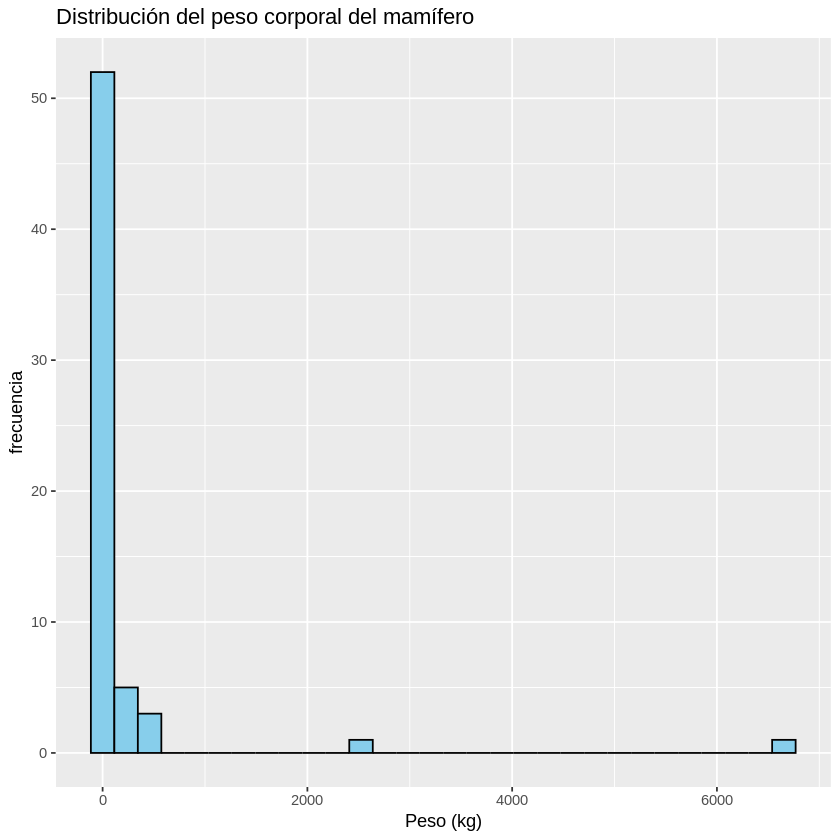

In [25]:
#Diagrama de barras de la variable BodyWht
ggplot(sleep_limpio_BodyWgt,aes(BodyWgt))+
  geom_histogram(bin=30, fill="skyblue", color = "black")+
  labs(title= "Distribución del peso corporal del mamífero",
x = "Peso (kg)",
y = "frecuencia")


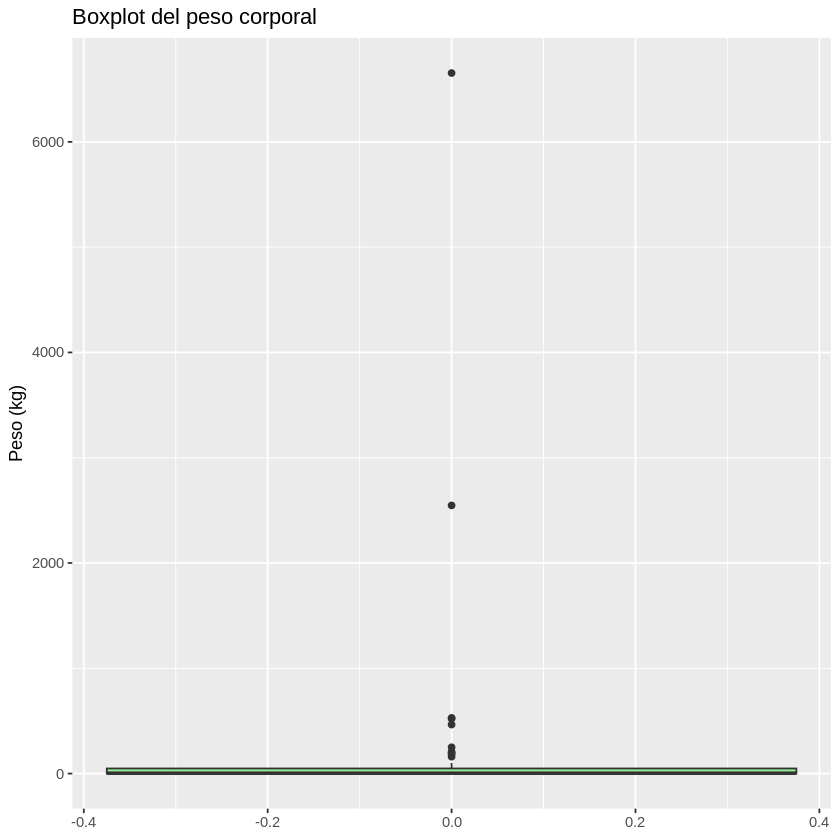

In [26]:
#Boxplot de la bariable BodyWgt
ggplot(sleep_limpio_BodyWgt,aes(y = BodyWgt))+
  geom_boxplot(fill= "lightgreen")+
  labs(title = "Boxplot del peso corporal",
y= "Peso (kg)")

Warning message:
“Removed 22 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


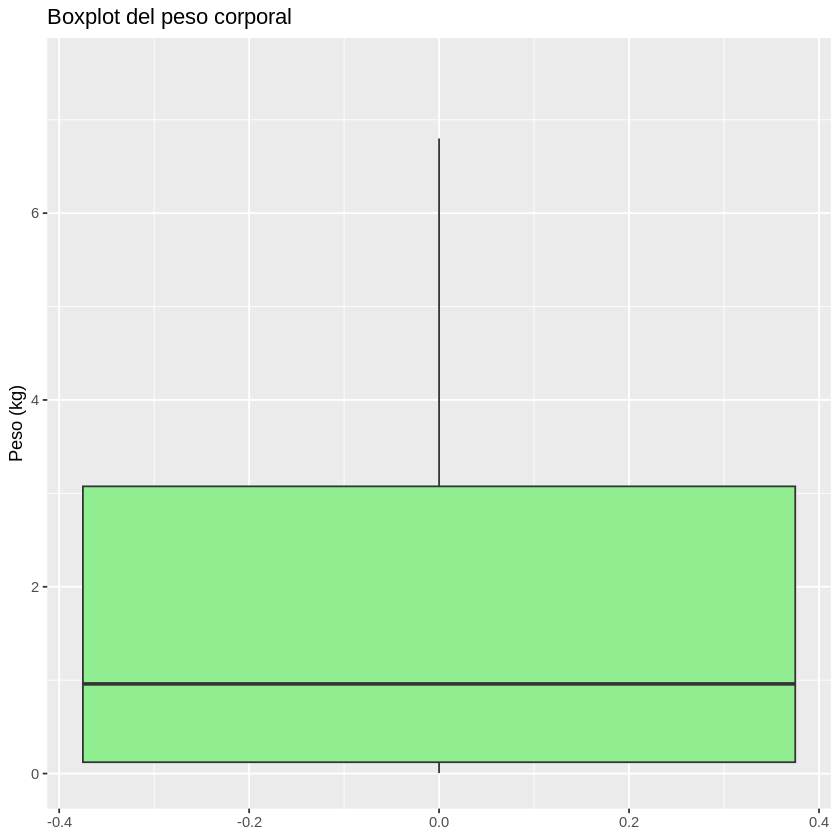

In [29]:
#Boxplot sin valores extremos y modificando los límites del eje
ggplot(sleep_limpio_BodyWgt,aes(y = BodyWgt))+
  geom_boxplot(fill= "lightgreen", outlier.shape = NA)+
  labs(title = "Boxplot del peso corporal",
y= "Peso (kg)")+
  ylim(0,7.5)

La variable **BodyWgt** tiene una distribución altamente asimétrica y con colas pesadas.

Las medidas robustas (mediana, IQR) son mucho más representativas que la media o la desviación típica.

Un 16% de los datos son outliers, todos por encima del límite superior.

Se recomienda para el análisis:
- Trabajar con logaritmos o escalas logarítmicas.
- Reportar mediana en lugar de media.

In [30]:
# Filtrar valores mayores que 0 antes de aplicar el log
# Crear una nueva columna con logaritmo base 10
sleep_limpio_BodyWgt <- sleep_limpio_BodyWgt%>%
  filter(BodyWgt>0)%>%
  mutate(log_BodyWgt = log10(BodyWgt))


In [31]:
# Calcular resumen estadístico de la variable logBodyWgt

(tabla_resultados2<- sleep_limpio_BodyWgt%>%
  summarise(
  #medidas de tendencia central
  media = mean(log_BodyWgt), #promedio
  mediana = median(log_BodyWgt), #mediana

  #medidas de dispersión
  varianza = var(log_BodyWgt), #varianza
  desviacion = sd(log_BodyWgt), #desviación
  minimo = min(log_BodyWgt), #mínimo
  maximo = max(log_BodyWgt), #máximo
  rango = maximo - minimo, #rango

  #Coeficiente de variación:
  coef_variacion = (desviacion / media)*100, #cv

  #Medidas de posición
  iqr = IQR(log_BodyWgt), #rango intercuartílico
  q1 = quantile(log_BodyWgt, 0.25), # primer cuartil (25%)
  q3 = quantile(log_BodyWgt, 0.75), # tercer cuartil (75%)
  p90 = quantile(log_BodyWgt, 0.90), # percentil (90%)
  LI =q1 - 1.5*iqr, # limite inferior.
  LS= q3 + 1.5*iqr, # límite superior.
  #COnteo de valores atípicos:
  total =n(), #cuenta el número de observaciones
  outliers = sum(log_BodyWgt < LI |log_BodyWgt > LS), # contar el número de valores atípicos
  proporcion_outliers = outliers / total, # proporción de datos atípicos

  #forma de la distribución:
  asimetria = skewness(log_BodyWgt), # asimetría
  curtosis = kurtosis(log_BodyWgt)
  )%>%
    #tranformación de la tabla (convirtiendo filas a columnas)
  pivot_longer(
    cols = everything(),
    names_to = "Estadístico",
    values_to = "Valor"
  )%>%
    #redondear los valores a 2 decimales y eliminamos al notación científica
  mutate(
    Valor = format(round(Valor,2), scientific = FALSE)))

Estadístico,Valor
<chr>,<chr>
media,0.58
mediana,0.52
varianza,1.84
desviacion,1.36
minimo,-2.30
maximo,3.82
rango,6.12
coef_variacion,233.50
iqr,1.90


### Tablas para informes

Usamos de la librería knitr de R, la función kable que permite crear tablas en documentos R Markdown.

In [33]:
# Mostrar tabla
kable(tabla_resultados1, caption = "\nResumen estadísticas descriptivas\nPosición\nForma de la distribución\nVariable original")
kable(tabla_resultados2, caption = "\nResumen estadísticas descriptivas\nPosición\nForma de la distribución\nVariable transformada")



Table: 
Resumen estadísticas descriptivas
Posición
Forma de la distribución
Variable original

|Estadístico         |Valor     |
|:-------------------|:---------|
|media               |198.79    |
|mediana             |3.34      |
|varianza            |808485.13 |
|desviacion          |899.16    |
|minimo              |0.00      |
|maximo              |6654.00   |
|rango               |6654.00   |
|coef_variacion      |452.32    |
|iqr                 |47.60     |
|q1                  |0.60      |
|q3                  |48.20     |
|p90                 |205.50    |
|LI                  |-70.80    |
|LS                  |119.61    |
|total               |62.00     |
|outliers            |10.00     |
|proporcion_outliers |0.16      |
|asimetria           |6.25      |
|curtosis            |40.60     |



Table: 
Resumen estadísticas descriptivas
Posición
Forma de la distribución
Variable transformada

|Estadístico         |Valor  |
|:-------------------|:------|
|media               |0.58   |
|mediana             |0.52   |
|varianza            |1.84   |
|desviacion          |1.36   |
|minimo              |-2.30  |
|maximo              |3.82   |
|rango               |6.12   |
|coef_variacion      |233.50 |
|iqr                 |1.90   |
|q1                  |-0.23  |
|q3                  |1.68   |
|p90                 |2.31   |
|LI                  |-3.08  |
|LS                  |4.53   |
|total               |62.00  |
|outliers            |0.00   |
|proporcion_outliers |0.00   |
|asimetria           |0.15   |
|curtosis            |-0.52  |

Warning message in geom_histogram(bin = 30, fill = "skyblue", color = "black"):
“Ignoring unknown parameters: `bin`”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


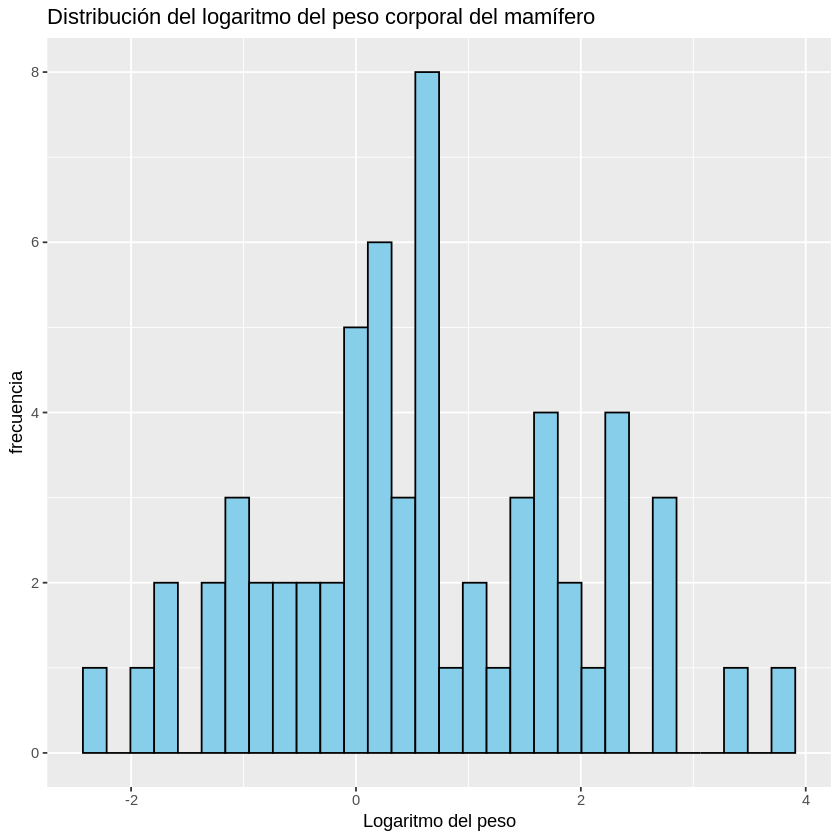

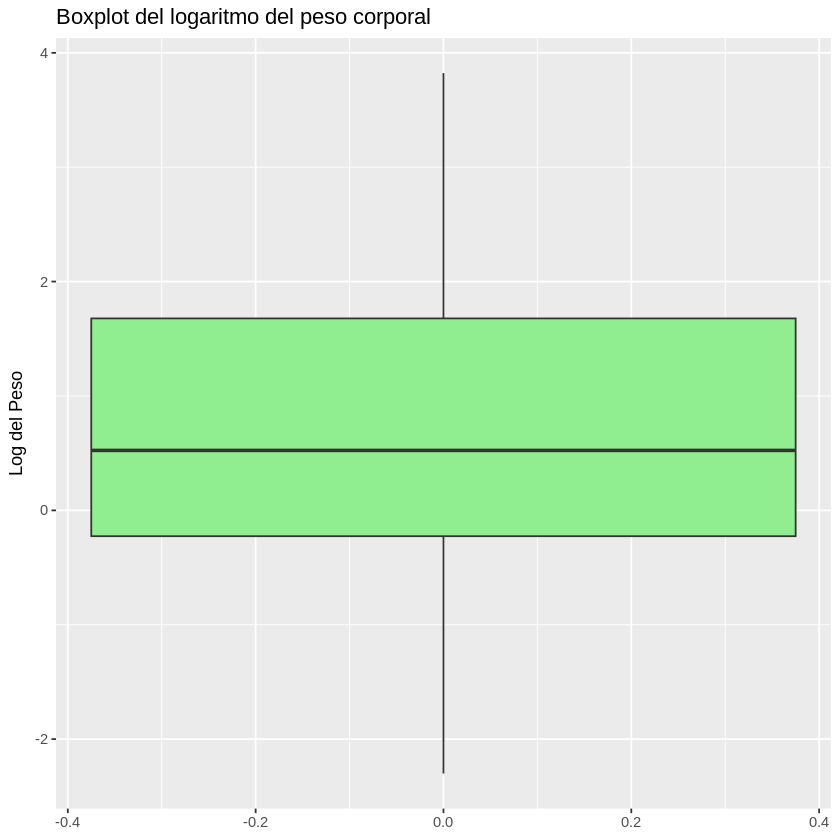

In [35]:
#histograma
#Diagrama de barras de la variable BodyWht
ggplot(sleep_limpio_BodyWgt,aes(log_BodyWgt))+
  geom_histogram(bin=30, fill="skyblue", color = "black")+
  labs(title= "Distribución del logaritmo del peso corporal del mamífero",
x = "Logaritmo del peso",
y = "frecuencia")


#Boxplot de la bariable logBodyWgt
ggplot(sleep_limpio_BodyWgt,aes(y = log_BodyWgt))+
  geom_boxplot(fill= "lightgreen")+
  labs(title = "Boxplot del logaritmo del peso corporal",
y= "Log del Peso")




¿La variable **BodyWgt** sigue una distribución normal?

Warning message in geom_histogram(aes(y = ..density..), bin = 30, fill = "skyblue", :
“Ignoring unknown parameters: `bin`”
Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


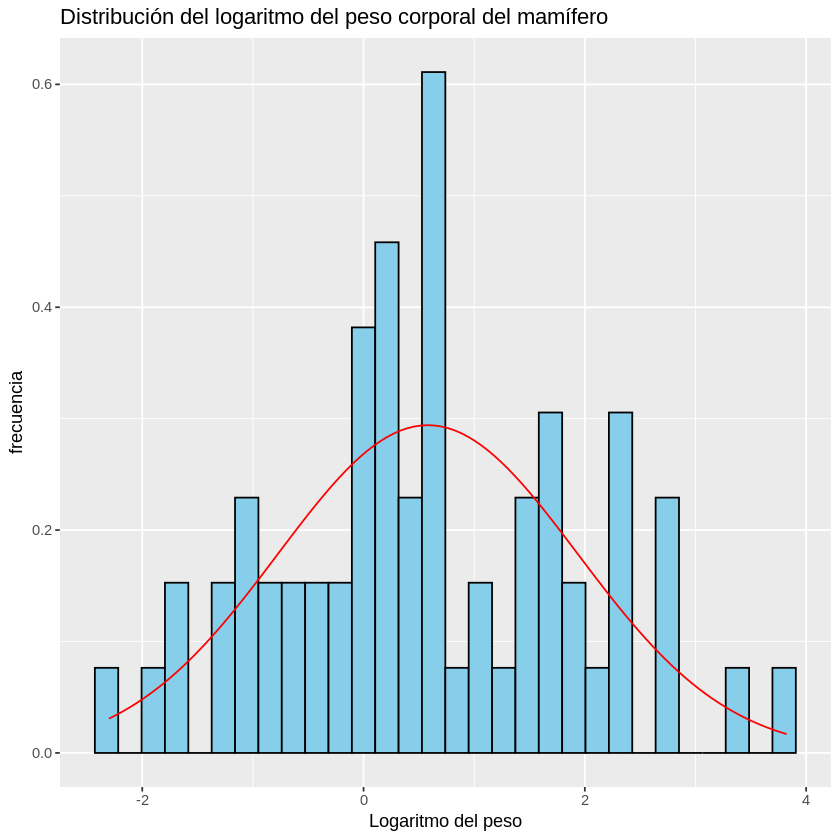

In [36]:
# Crear gráfico: Histograma de la variable BodyWgt con curva normal superpuesta

ggplot(sleep_limpio_BodyWgt,aes(log_BodyWgt))+
  geom_histogram(
  aes(y = ..density..),
  bin=30, fill="skyblue", color = "black")+
    stat_function(
      fun= dnorm, #superpone una curva de densidad de la distribución normal,
      args =list(
        mean = mean(sleep_limpio_BodyWgt$log_BodyWgt),
        sd= sd(sleep_limpio_BodyWgt$log_BodyWgt)
      ),
      color="red" #color de la curva normal
    )+
  labs(title= "Distribución del logaritmo del peso corporal del mamífero",
x = "Logaritmo del peso",
y = "frecuencia")






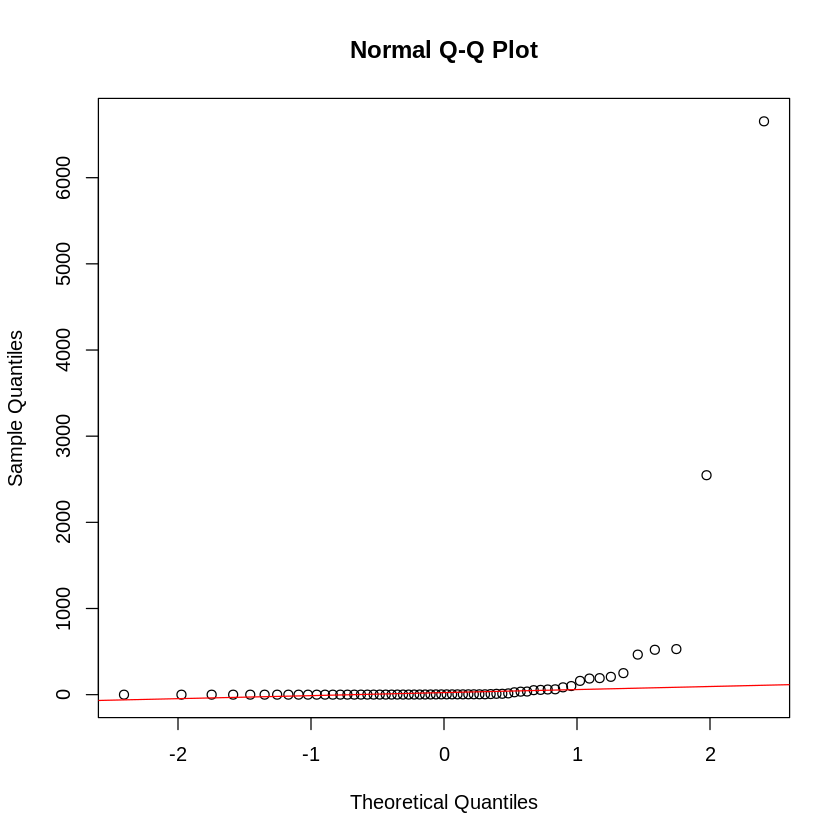

In [39]:
#Diagramas q-q plot:

qqnorm(sleep_limpio_BodyWgt$BodyWgt)
qqline(sleep_limpio_BodyWgt$BodyWgt, col= "red")






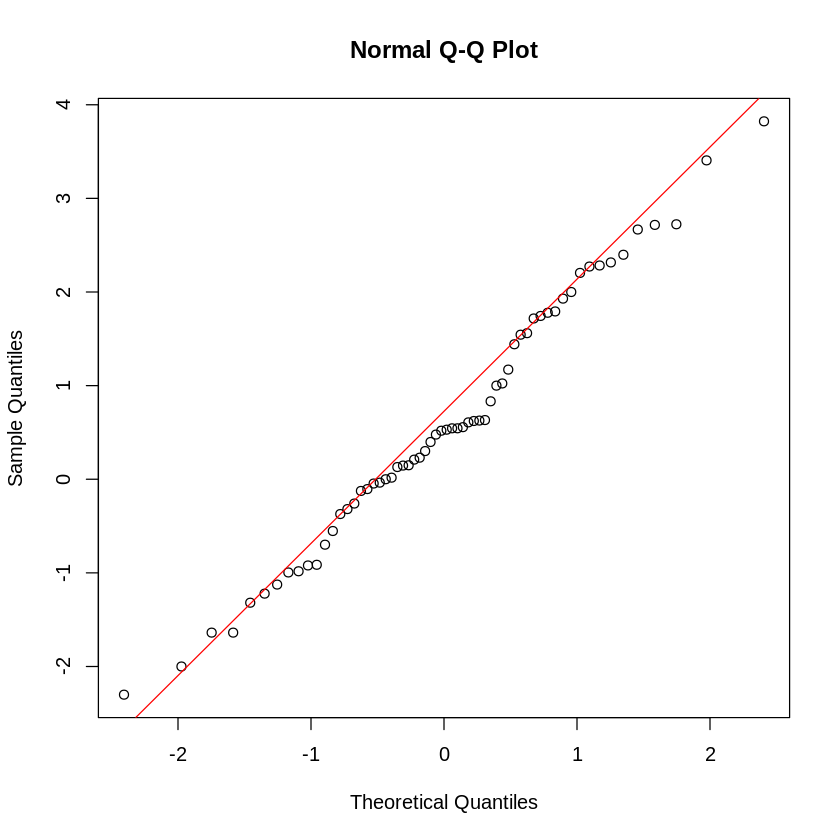

In [40]:
qqnorm(sleep_limpio_BodyWgt$log_BodyWgt)
qqline(sleep_limpio_BodyWgt$log_BodyWgt, col= "red")

In [41]:
#Test de normalidad variable original

shapiro.test(sleep_limpio_BodyWgt$BodyWgt)

#Test de normalidad variable transformada

shapiro.test(sleep_limpio_BodyWgt$log_BodyWgt)


	Shapiro-Wilk normality test

data:  sleep_limpio_BodyWgt$BodyWgt
W = 0.22239, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  sleep_limpio_BodyWgt$log_BodyWgt
W = 0.98645, p-value = 0.7272


Podemos así ver la importancia del análisis inicial y de la conveniencia de usar transformaciones de las variables.

## Análisis de Correlación y Covarianza

Explorar relaciones entre variables cuantitativas, identificar patrones lineales y cuantificar la fuerza y dirección de esas relaciones mediante medidas como correlación y covarianza.

- **Correlación de Pearson (cor())**

Variante normalizada de la covarianza.

Valores que oscilan entre -1 y 1:

* +1: correlación perfecta positiva
* 0: sin relación lineal
* -1: correlación perfecta negativa

Supone linealidad y normalidad de las variables.

- **Correlación de Spearman**

Se basa en rangos → no asume normalidad ni linealidad.
Útil para datos ordinales o relaciones no lineales monótonas.

- **Covarianza (cov())**

Mide la tendencia conjunta de dos variables a aumentar o disminuir.

* Valor positivo: las variables tienden a crecer juntas.
* Valor negativo: una aumenta y la otra disminuye.

Muy sensible a la escala de las variables




### Correlación:

Comenzamos con el análisis de correlación

In [45]:
# Comenzamos seleccionando solo variables numéricas completas
# recordemos que tenemos que convertir las trews variables pred, exp y danger en factores:

# Conversión de variables numéricas a factores (categorías)
sleep_limpio <- sleep%>%
  mutate(
  Pred = as.factor(Pred),
  Exp= as.factor(Exp),
  Danger=as.factor(Danger)
  )

(sleep_numerico<- sleep_limpio%>%
  select_if(is.numeric))



#Para no perder los datos, vamos a imputar con ridge, como hicimos en el módulo II:
new_sleep_ridge <- empire::estimate_ridge(data=sleep_numerico, diff=10, ridge_alpha =0)$new_dat
# Aplicar imputación por regresión lineal penalizada (ridge)




BodyWgt,BrainWgt,NonD,Dream,Sleep,Span,Gest
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6654.000,5712.0,NA,NA,3.3,38.6,645
1.000,6.6,6.3,2.0,8.3,4.5,42
3.385,44.5,NA,NA,12.5,14.0,60
0.920,5.7,NA,NA,16.5,NA,25
2547.000,4603.0,2.1,1.8,3.9,69.0,624
10.550,179.5,9.1,0.7,9.8,27.0,180
0.023,0.3,15.8,3.9,19.7,19.0,35
160.000,169.0,5.2,1.0,6.2,30.4,392
3.300,25.6,10.9,3.6,14.5,28.0,63


In [46]:
new_sleep_ridge

BodyWgt,BrainWgt,NonD,Dream,Sleep,Span,Gest
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6654.000,5712.0,0.9257169,2.2737756,3.300000,38.60000,645.00000
1.000,6.6,6.3000000,2.0000000,8.300000,4.50000,42.00000
3.385,44.5,9.7976974,2.3118687,12.500000,14.00000,60.00000
0.920,5.7,12.9877191,3.2875601,16.500000,10.23500,25.00000
2547.000,4603.0,2.1000000,1.8000000,3.900000,69.00000,624.00000
10.550,179.5,9.1000000,0.7000000,9.800000,27.00000,180.00000
0.023,0.3,15.8000000,3.9000000,19.700000,19.00000,35.00000
160.000,169.0,5.2000000,1.0000000,6.200000,30.40000,392.00000
3.300,25.6,10.9000000,3.6000000,14.500000,28.00000,63.00000


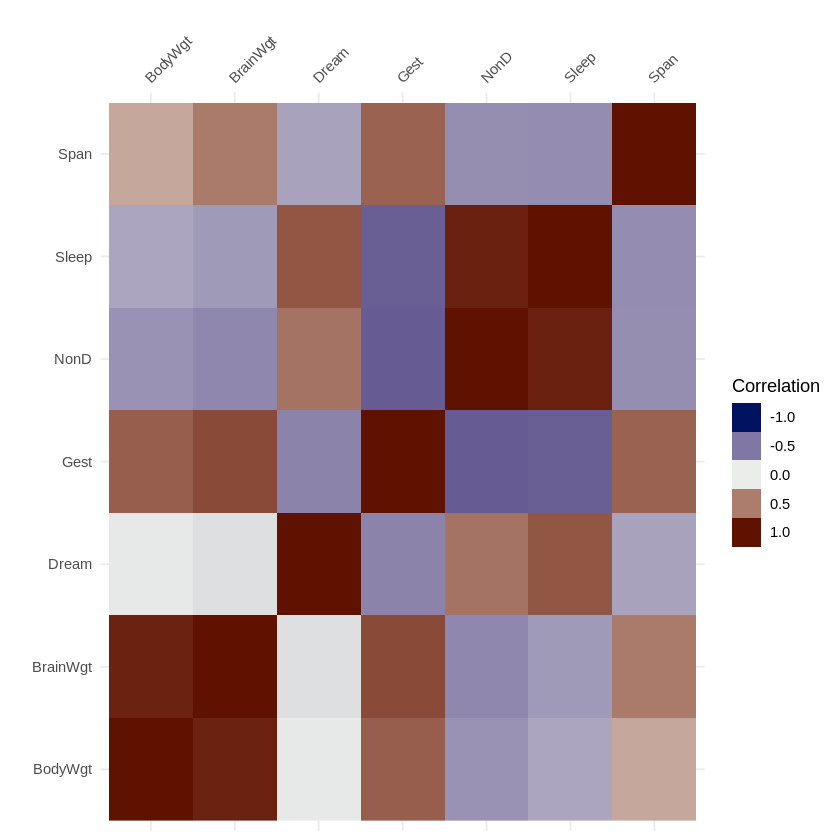

In [47]:
# Correlación de Pearson
visdat::vis_cor(new_sleep_ridge,na_action = "complete.obs")



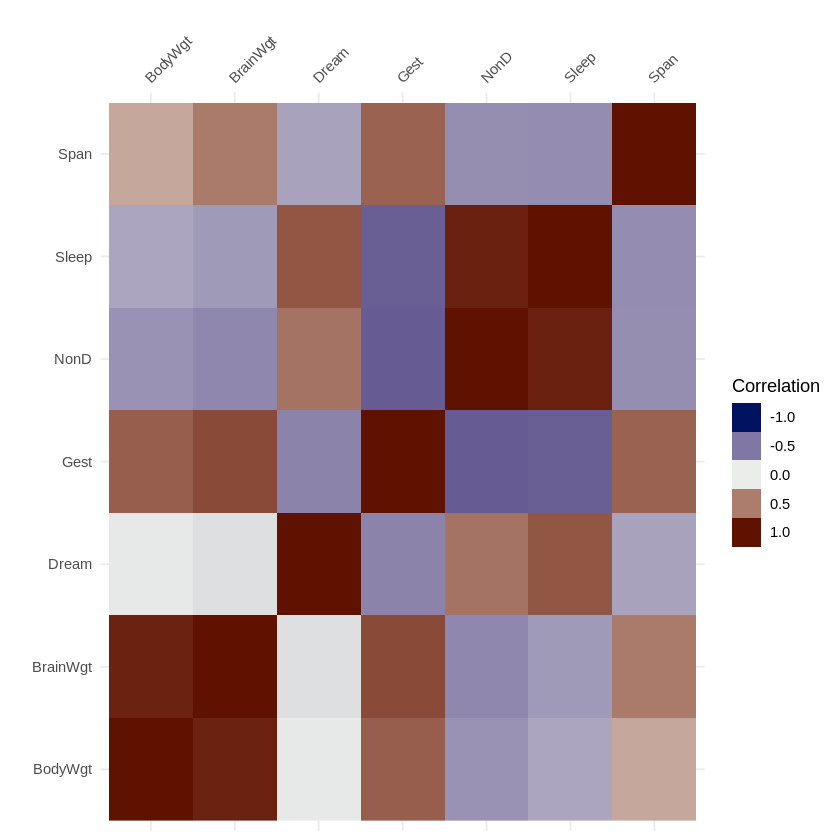

In [48]:
# Correlación de Spearman

visdat::vis_cor(new_sleep_ridge,corr_method = "spearman",na_action = "complete.obs")


| Característica      | **Correlación de Pearson**            | **Correlación de Spearman**                                  |
| ------------------- | ------------------------------------- | ------------------------------------------------------------ |
| Tipo de relación    | Lineal                                | Monótona (creciente o decreciente, no necesariamente lineal) |
| Datos esperados     | Cuantitativos, normales, sin outliers | Cuantitativos u ordinales, **no requiere normalidad**        |
| Sensible a outliers |  Sí, mucho                           |  No, al trabajar con rangos                                 |
| Escala utilizada    | Escala original                       | Rangos (datos convertidos a posiciones)                      |


**Comparación visual entre ambas matrices**

* Matriz de Pearson:

Se observan correlaciones muy altas (casi 1) entre algunas variables como BodyWgt y BrainWgt.

También aparecen correlaciones negativas marcadas entre variables como Gest y Sleep.

Sin embargo, la intensidad puede estar amplificada por outliers o por relaciones no perfectamente lineales.

* Matriz de Spearman:

Las correlaciones siguen una tendencia similar, pero son más moderadas (es decir, no tan extremas).

Las relaciones como BrainWgt ~ BodyWgt siguen siendo fuertes, pero no perfectas.

Algunas correlaciones negativas están más suavizadas, lo cual puede reflejar que las relaciones no son lineales, pero sí monótonas.

                                                                                             
- **Lineal**:

Cuando los datos siguen aproximadamente una **línea recta**. Es decir, por cada incremento en X, Y cambia siempre en proporción constante.                                          

- **Monótona**:

Cuando una variable **siempre aumenta o disminuye con la otra**, pero no necesariamente en línea recta. Puede crecer más rápido, más lento.


**Podemos responder entonces:**

- ¿Hay colinealidad?
- ¿Qué variables parecen tener una relación no lineal?
- ¿Conviene usar Spearman si hay outliers?

### Covarianza:

In [53]:
# Paso 1: Convertimos la matriz de covarianza en data frame y la reestructuramos en formato largo
matriz_cov <- cov(new_sleep_ridge)
matriz_cov

(melted_cov <- as.data.frame(matriz_cov)%>%
  mutate(var1 = rownames(.))%>% # crar una columna con los nombres de fila
pivot_longer(
-var1, # converti las columnas restantes en pares, es decir, en clave-valor
names_to ="var2", # nombre de la variable que representa las columnas originales
values_to = "value"# valor de la covarianza entre var1 y la var2
))





,BodyWgt,BrainWgt,NonD,Dream,Sleep,Span,Gest
BodyWgt,808485.12788,781397.93941,-1241.325328,-21.667688,-1232.147953,4885.107302,83563.50667
BrainWgt,781397.93941,865418.91040,-1452.269914,-71.257953,-1488.564689,8461.856932,99262.71147
NonD,-1241.32533,-1452.26991,13.236681,2.747582,15.794023,-25.674787,-326.22159
Dream,-21.66769,-71.25795,2.747582,1.907447,4.387454,-7.620708,-88.07231
Sleep,-1232.14795,-1488.56469,15.794023,4.387454,21.408601,-32.925464,-406.34594
Span,4885.10730,8461.85693,-25.674787,-7.620708,-32.925464,313.981745,1598.85429
Gest,83563.50667,99262.71147,-326.221586,-88.072314,-406.345936,1598.854293,20728.94932


var1,var2,value
<chr>,<chr>,<dbl>
BodyWgt,BodyWgt,808485.127878
BodyWgt,BrainWgt,781397.939411
BodyWgt,NonD,-1241.325328
BodyWgt,Dream,-21.667688
BodyWgt,Sleep,-1232.147953
BodyWgt,Span,4885.107302
BodyWgt,Gest,83563.506674
BrainWgt,BodyWgt,781397.939411
BrainWgt,BrainWgt,865418.910402


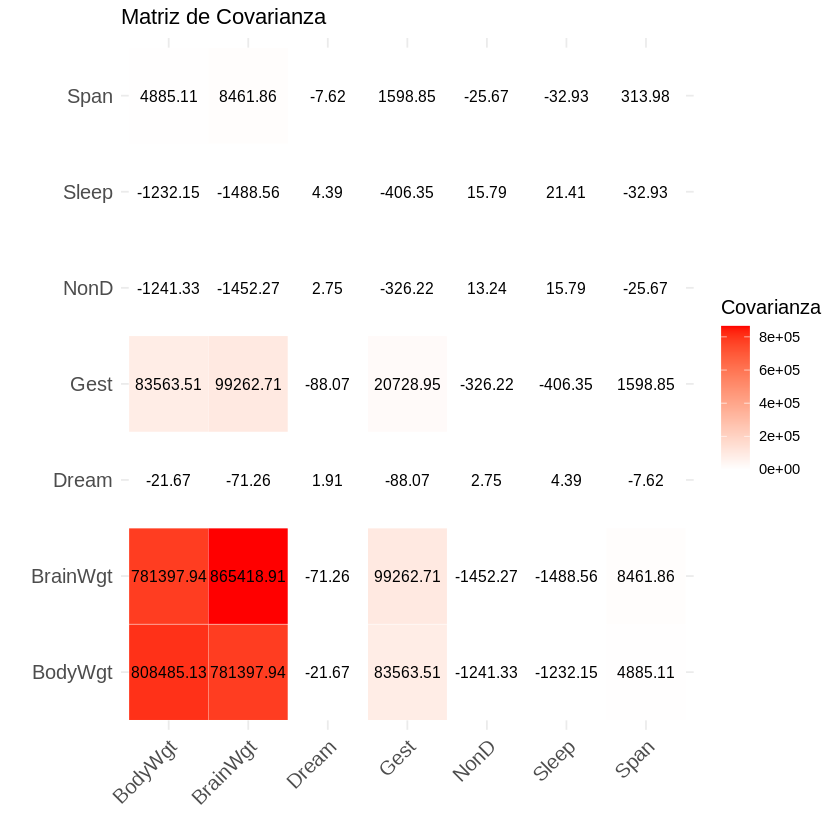

In [64]:
# Paso 2: Visualizamos la matriz de covarianza como un mapa de calor con valores incluidos
ggplot(melted_cov, aes(x = var1, y = var2, fill = value)) +
  geom_tile(color = "white") +  # Crea las celdas del mapa de calor con borde blanco
  geom_text(aes(label = round(value, 2)), size = 3.3, color = "black") +  # Agrega los valores de covarianza redondeados sobre cada celda
  scale_fill_gradient2(low = "blue", mid = "white", high = "red") +  # Paleta de color para distinguir signo e intensidad
  labs(title = "Matriz de Covarianza",    # Título del gráfico
       x = "", y = "", fill = "Covarianza") +  # Etiquetas
  theme_minimal() +  # Tema limpio
  theme(
    legend.title = element_text(size = 12), #Modifica el tamaño del texto de la escala de la
    # covarianza, es decir, de la leyenda.
    axis.text.x = element_text(angle = 45, hjust = 1, size = 12),# Gira etiquetas del eje X para mejorar legibilidad
    axis.text.y = element_text(hjust = 1, size = 12) # modifica el tamaño del texto del eje y
)




¿Qué vemos?:

El valor numérico de la covarianza entre dos variables (p. ej. entre BodyWgt y BrainWgt) está asociado con un color rojo más intenso, indicando mayor covarianza positiva.

Los valores más cercanos a 0 (blanco o rosa muy claro) indican poca o nula relación lineal conjunta.


1. Covarianzas altas y positivas:

* BodyWgt con BrainWgt

* BodyWgt con Gest

* BrainWgt con Gest


Estas variables tienden a variar conjuntamente: cuando una aumenta, las otras también. Esto tiene sentido biológico, ya que animales más grandes (mayor BodyWgt) tienden a tener cerebros más grandes (BrainWgt) y gestaciones más largas (Gest).

2. Covarianzas negativas

* BodyWgt con Sleep
* BodyWgt con NonD
* Gest con Sleep


Estas relaciones indican que cuando una variable aumenta, la otra tiende a disminuir.

Por ejemplo:

Los animales más grandes tienden a dormir menos.
Los animales con mayor gestación también duermen menos (posiblemente especies más longevas, activas o expuestas).

3. Covarianzas cercanas a cero

* Dream con casi todas las demás variables.
* NonD con Dream, Gest, etc.


No hay una relación clara ni fuerte entre estas variables en términos de variación conjunta.

Es **importante* tener en cuenta que la covarianza depende de las unidades de las variables, por eso hay números muy grandes (como BrainWgt en gramos, por ejemplo).

Para comparar más fácilmente entre pares de variables, es mejor usar la correlación, que está normalizada entre -1 y 1.

Esta matriz sí es muy útil para detectar agrupaciones de variables altamente relacionadas, como BodyWgt, BrainWgt, Gest.

## Tablas de frecuencias y análisis de variables categóricas


En esta parte del módulo, nos enfocaremos en reconocer y analizar variables categóricas nominales y ordinales.

Para ello, elaboraremos tablas de frecuencias (absolutas y relativas).

Vamos a representar visualmente la distribución de variables categóricas.

Y exploraremos asociaciones entre variables categóricas (introducción a tablas de contingencia).

In [65]:
sleep_limpio

BodyWgt,BrainWgt,NonD,Dream,Sleep,Span,Gest,Pred,Exp,Danger
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
6654.000,5712.0,NA,NA,3.3,38.6,645,3,5,3
1.000,6.6,6.3,2.0,8.3,4.5,42,3,1,3
3.385,44.5,NA,NA,12.5,14.0,60,1,1,1
0.920,5.7,NA,NA,16.5,NA,25,5,2,3
2547.000,4603.0,2.1,1.8,3.9,69.0,624,3,5,4
10.550,179.5,9.1,0.7,9.8,27.0,180,4,4,4
0.023,0.3,15.8,3.9,19.7,19.0,35,1,1,1
160.000,169.0,5.2,1.0,6.2,30.4,392,4,5,4
3.300,25.6,10.9,3.6,14.5,28.0,63,1,2,1


In [69]:
# Cargar el paquete janitor, que incluye funciones útiles para el manejo de tablas categóricas

# Tabla de frecuencias absolutas y relativas para la variable 'Danger'
sleep_limpio%>%
  tabyl(Danger)%>%
  arrange(desc(n))%>%
  mutate(
  freq_acumulada = cumsum(n), # frecuencia acumulada absoluta
  pct = round(percent,2),
  pct_acumulada = round(cumsum(percent),2)
  )
  #adorn_pct_formatting() #convierte en proporciones en formato porcentaje y redondea




# Tabla de frecuencias para la variable 'Pred'
sleep_limpio%>%
  tabyl(Pred)%>%
  arrange(desc(n))%>%
  mutate(
  freq_acumulada = cumsum(n), # frecuencia acumulada absoluta
  pct = round(percent,2),
  pct_acumulada = round(cumsum(percent),2)
  )





# Tabla de frecuencias para la variable 'Exp'
sleep_limpio%>%
  tabyl(Exp)%>%
  arrange(desc(n))%>%
  mutate(
  freq_acumulada = cumsum(n), # frecuencia acumulada absoluta
  pct = round(percent,2),
  pct_acumulada = round(cumsum(percent),2)
  )






Danger,n,percent,freq_acumulada,pct,pct_acumulada
<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>
1,19,0.3064516,19,0.31,0.31
2,14,0.2258065,33,0.23,0.53
3,10,0.1612903,43,0.16,0.69
4,10,0.1612903,53,0.16,0.85
5,9,0.1451613,62,0.15,1.00


Pred,n,percent,freq_acumulada,pct,pct_acumulada
<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>
2,15,0.2419355,15,0.24,0.24
1,14,0.2258065,29,0.23,0.47
5,14,0.2258065,43,0.23,0.69
3,12,0.1935484,55,0.19,0.89
4,7,0.1129032,62,0.11,1.00


Exp,n,percent,freq_acumulada,pct,pct_acumulada
<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>
1,27,0.43548387,27,0.44,0.44
2,13,0.20967742,40,0.21,0.65
5,13,0.20967742,53,0.21,0.85
4,5,0.08064516,58,0.08,0.94
3,4,0.06451613,62,0.06,1.00


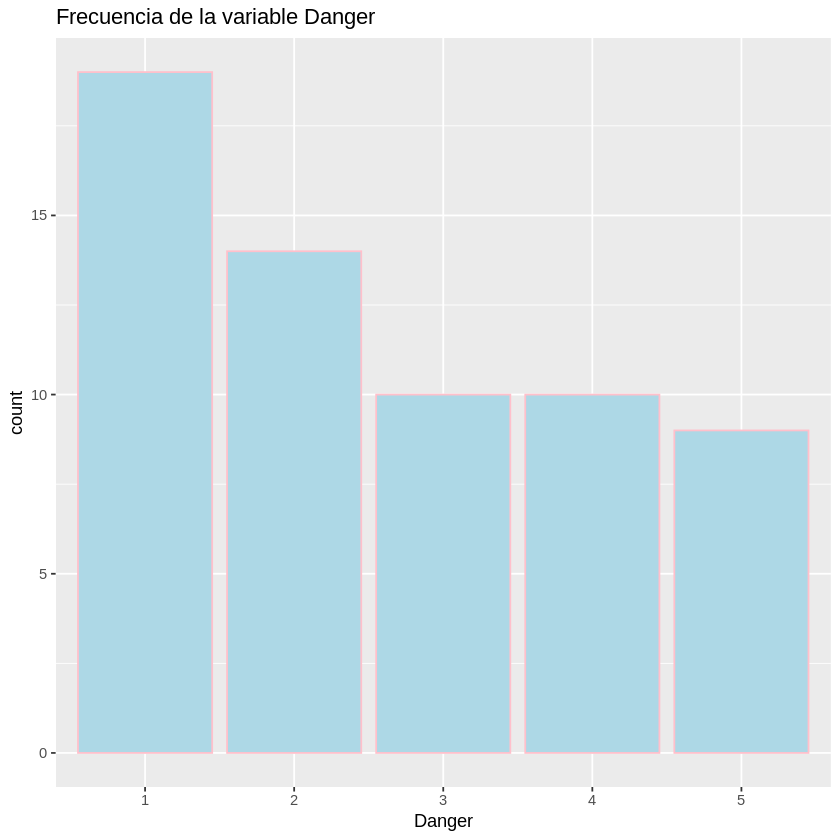

In [70]:
# Gráfico de barras de la variable Danger
ggplot(sleep_limpio,aes(Danger))+
  geom_bar(fill= "lightblue", color = "pink")+
  labs(title = "Frecuencia de la variable Danger")



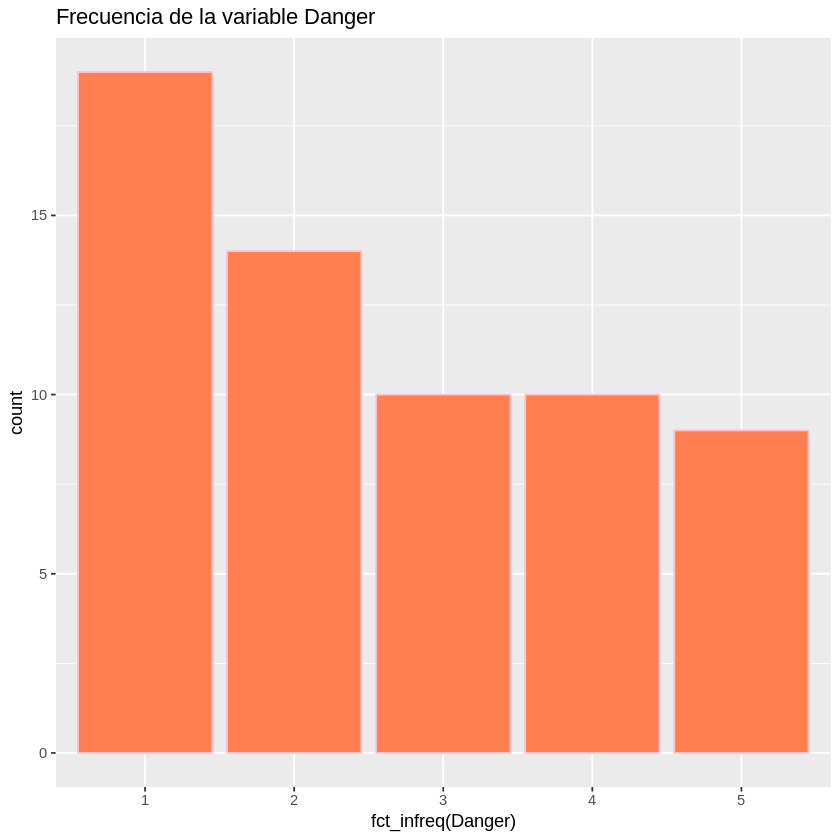

In [72]:
# Gráfico de barras de la variable Danger ordenado descendentemente

ggplot(sleep_limpio,aes(fct_infreq(Danger)))+
  geom_bar(fill= "coral", color = "pink")+
  labs(title = "Frecuencia de la variable Danger")



Danger,n,porcentaje,etiqueta
<fct>,<int>,<dbl>,<chr>
1,19,0.3064516,30.65%
2,14,0.2258065,22.58%
3,10,0.1612903,16.13%
4,10,0.1612903,16.13%
5,9,0.1451613,14.52%


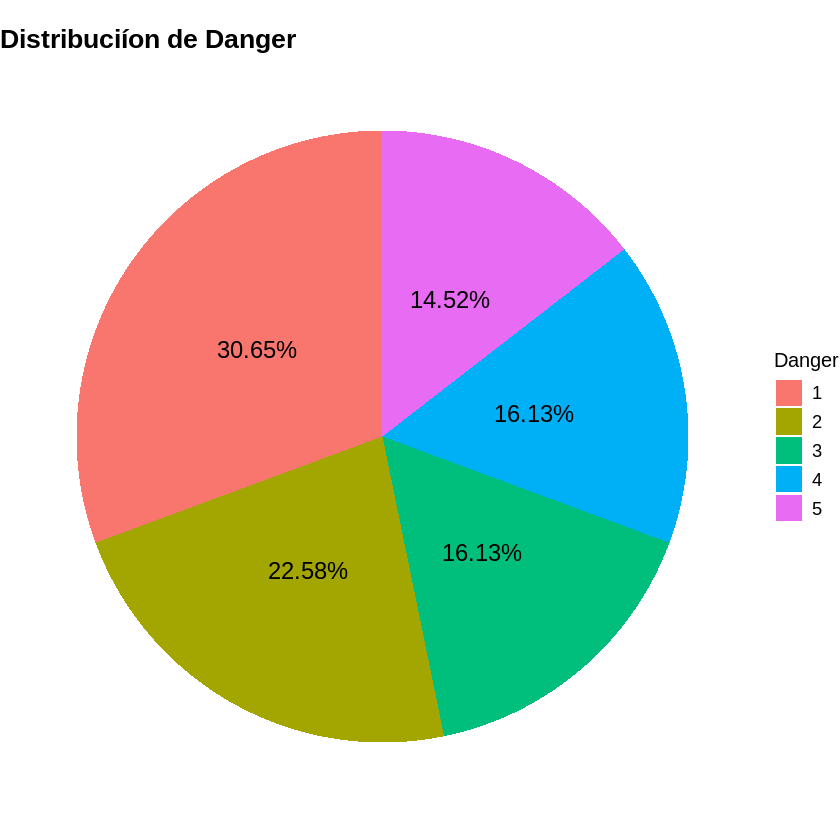

In [76]:
# Para graficar un pie-chart
# ggplo2 no ofrece directamente un pie-chart, por lo que se deben hacer algunos cálculos
# Paso 1: Calcular la tabla de frecuencias

(tabla_pie <- sleep_limpio%>%
  count(Danger)%>% #esto genera la "n" que el conteo de casos
  mutate(
  porcentaje = n/sum(n),
  etiqueta=paste0(round(porcentaje*100,2),"%")
  ))




# Paso 2: Crear el gráfico de pastel
ggplot(tabla_pie,aes(x = "",y = porcentaje, fill = Danger))+
  geom_bar(stat = "identity", width = 1) + #
  coord_polar("y", start=0)+
  # Agregar etiquetas de porcentaje centradas en cada porción
    geom_text(aes(label=etiqueta),
    position = position_stack(vjust = 0.5),
    size = 5)+
  # Agregar títulos y leyenda
labs(title = "Distribuciíon de Danger", x="",y="",fill="Danger")+
  # Modificar el tamaño del título y leyenda
theme_void() + #elimina ejes o cualquier fondo
  theme(
  plot.title = element_text(size=16, face = "bold"),
  legend.title = element_text(size = 12),
  legend.text = element_text(size = 11)
  )





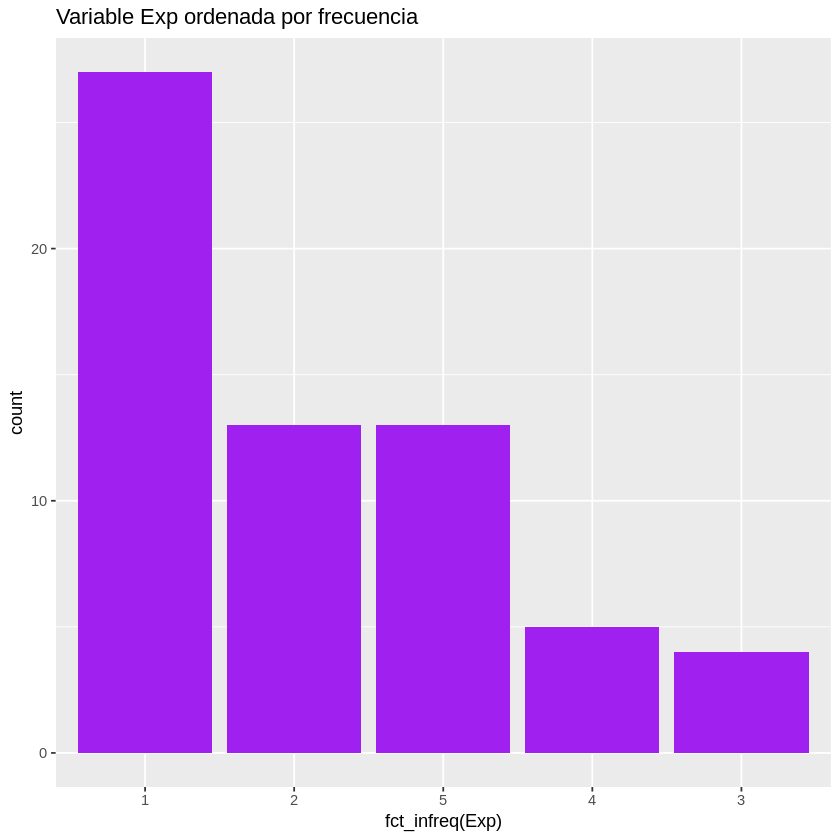

In [74]:
#Diagarama de barras de la bariable Exp ordenado por frecuencia descendente
ggplot(sleep_limpio, aes(x = fct_infreq(Exp))) +
  geom_bar(fill = "purple") +
  labs(title = "Variable Exp ordenada por frecuencia")



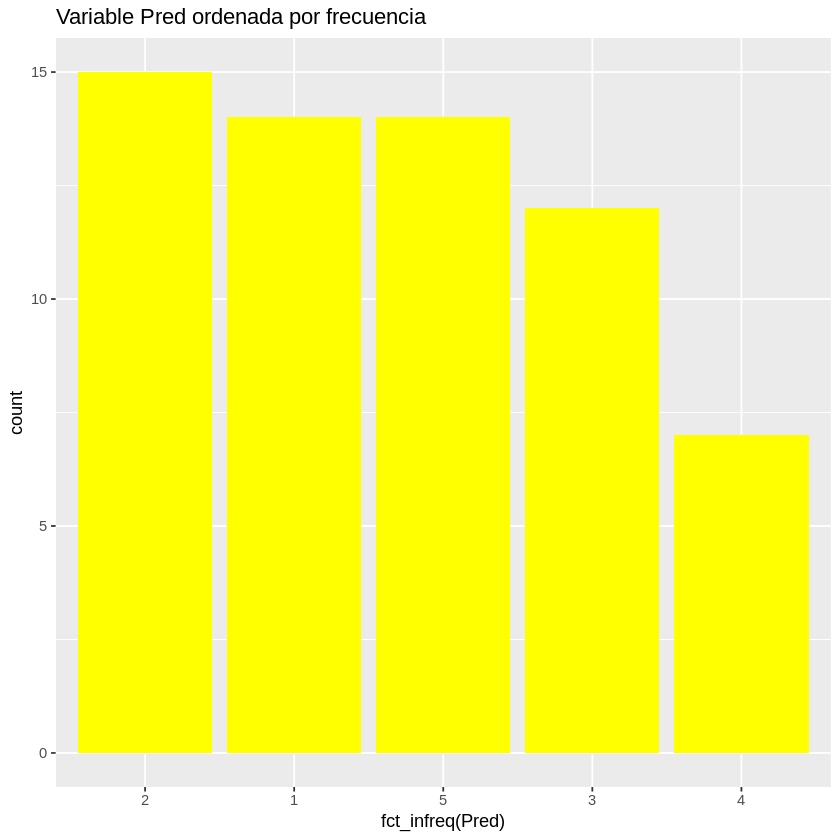

In [77]:
#Diagrama de frecuencias variable Pred

ggplot(sleep_limpio, aes(x = fct_infreq(Pred))) +
  geom_bar(fill = "yellow") +
  labs(title = "Variable Pred ordenada por frecuencia")



Pred,n,porcentaje,etiqueta
<fct>,<int>,<dbl>,<chr>
1,14,0.2258065,22.58%
2,15,0.2419355,24.19%
3,12,0.1935484,19.35%
4,7,0.1129032,11.29%
5,14,0.2258065,22.58%


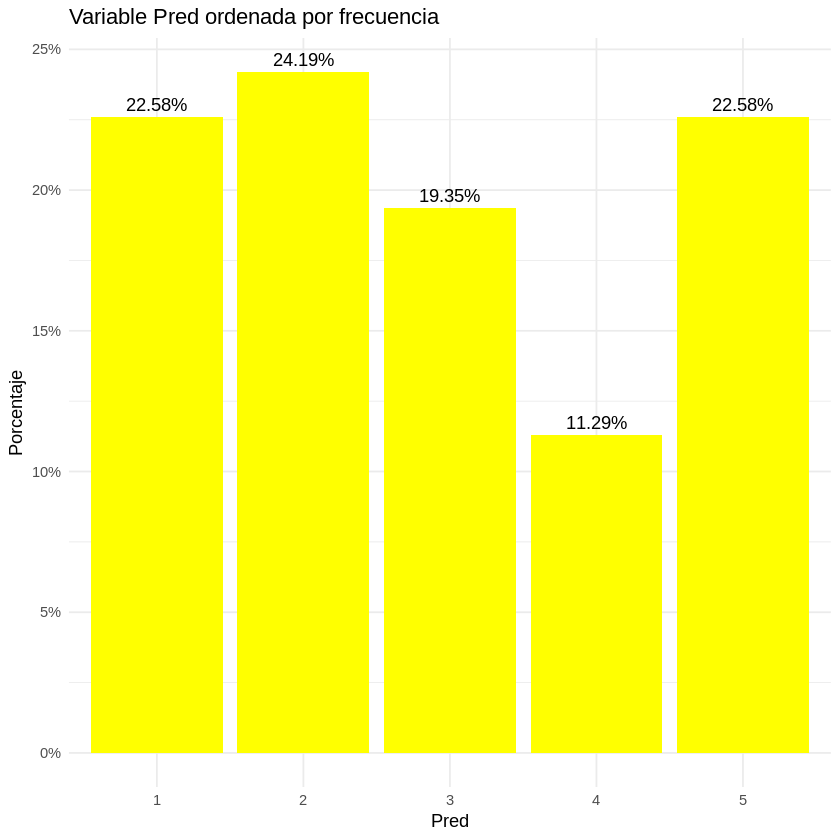

In [78]:
#Para poder agregar la etiqueta de los porcentajes:

# Paso 1: Calcular las frecuencias relativas

(tabla_pred <- sleep_limpio%>%
  count(Pred)%>% #esto genera la "n" que el conteo de casos
  mutate(
  porcentaje = n/sum(n),
  etiqueta=paste0(round(porcentaje*100,2),"%")
  ))

# Paso 2: Gráfico con etiquetas
ggplot(tabla_pred, aes(x = fct_infreq(Pred), y = porcentaje)) +
  geom_col(fill = "yellow") +
  geom_text(aes(label=etiqueta, vjust = -0.5))+
  scale_y_continuous(labels = scales::percent_format(accuracy = 1))+
  labs(title = "Variable Pred ordenada por frecuencia",
x="Pred",y ="Porcentaje")+
  theme_minimal()







### Tablas cruzadas

In [ ]:
# Tabla cruzada entre dos variables categóricas
# Tabla cruzada con porcentajes por fila y renombrado








In [ ]:
#Diagrama de barras con dos variables categóricas e inclusión de la frecuencia

# Paso 1: Calcular proporciones por grupo





# Paso 2: Gráfico de barras apiladas con etiquetas









In [ ]:
# Análisis de asociación o relación entre dos variables categóricas






* Si el valor-p es bajo (generalmente < 0.05):

Hay evidencia para rechazar la hipótesis nula, por lo que las variables sí están asociadas.

* Si el valor-p es alto:

No rechazamos la hipótesis nula, por lo que no hay suficiente evidencia para concluir que hay una relación, por lo que las variables parecen independientes.



El test de Chi-cuadrado asume que:

Al menos el 80% de las celdas deben tener frecuencias esperadas ≥ 5.

Ninguna celda debería tener una frecuencia esperada menor que 1.

Si esto no se cumple, la aproximación al valor-p usando la distribución Chi² puede no ser confiable, y por eso R nos advierte.



## Distribuciones de probabilidad


¿Qué es una distribución de probabilidad?

Una distribución de probabilidad describe cómo se distribuyen los valores posibles de una variable aleatoria. Es un modelo matemático que asigna una probabilidad a cada valor (discreto) o rango de valores (continuo).

Para variables discretas, usamos funciones de masa de probabilidad (como binomial o Poisson).
Para variables continuas, usamos funciones de densidad (como la normal o exponencial).






### Distribución normal:

Es una de las más comunes y útiles en estadística:

Tiene forma de campana simétrica.

Se define por dos parámetros:

* Media (μ)
* Desviación estándar (σ)

**Ejemplo:**

Comparar la distribución empírica de una variable cuantitativa con la teórica normal, usando ggplot2.

Usaremos la variable log_BodyWgt (peso logarítmico), ya que anteriormente mostramos que la transformación mejora la simetría y reduce outliers.

In [ ]:
# Crear gráfico con histograma y curva de densidad normal teórica



  # Histograma con densidad (no frecuencia)




  # Curva de densidad normal teórica ajustada a los datos





  # Etiquetas y estilo






--------------
| Función   | ¿Qué hace?                       | Ejemplo práctico                |
| --------- | -------------------------------- | ------------------------------- |
| `rnorm()` | Genera datos aleatorios          | Simulación de muestras          |
| `dnorm()` | Densidad (altura de la curva)    | Dibujar curva normal            |
| `pnorm()` | Probabilidad acumulada           | Calcular $P(X < x)$             |
| `qnorm()` | Cuantil inverso (valor de corte) | Buscar z tal que $P(X < z) = p$ |

-------------

**Ejercicio**:

Se sabe que el tiempo promedio que duerme un mamífero adulto es de 10 horas al día, con una desviación estándar de 2 horas.
Se asume que los tiempos de sueño siguen una distribución normal.


Grafica la distribución normal con μ=10 y σ=2.

Calcula las siguientes probabilidades:
* Que un mamífero duerma más de 12 horas al día.
* Que un mamífero duerma entre 8 y 12 horas.
* Que un mamífero duerma menos de 6 horas.

Visualiza las áreas bajo la curva correspondientes a cada probabilidad.

Interpreta los resultados.

In [4]:
# Parámetros de la distribución
mu <- 10      # media
sigma <- 2    # desviación estándar

# Secuencia de valores x para graficar la curva
x_vals <- seq(0, 20, by = 0.1)

# Crear curva de densidad




# Cálculo de las probabilidades:
# a) P(X > 12)




# b) P(8 < X < 12)




# c) P(X < 6)




# Resultados




### Distribución Binomial

Modela el número de éxitos en un número fijo de ensayos independientes con dos posibles resultados: éxito o fracaso.

**Ejemplo típico:**

Lanzar una moneda 10 veces.
Probabilidad de obtener 6 caras.

Parámetros de esta distribución:
* n = número de ensayos
* p = probabilidad de éxito

In [ ]:
# Distribución binomial: 20 ensayos, probabilidad de éxito 0.3





# Gráfico de barras de la distribución







-------------------
| Función                 | Qué hace                                              | Ejemplo                              |
| ----------------------- | ----------------------------------------------------- | ------------------------------------ |
| `rbinom(n, size, prob)` | Simula datos binomiales (n muestras de tamaño `size`) | `rbinom(10, size = 20, prob = 0.5)`  |
| `dbinom(x, size, prob)` | Probabilidad exacta $P(X = x)$                        | `dbinom(5, size = 10, prob = 0.5)`   |
| `pbinom(q, size, prob)` | Probabilidad acumulada $P(X \leq q)$                  | `pbinom(6, 10, 0.5)` → $P(X \leq 6)$ |
| `qbinom(p, size, prob)` | Cuantil: valor $x$ tal que $P(X \leq x) = p$          | `qbinom(0.95, 10, 0.5)`              |

-------------


**Ejercicio**

Un grupo de biólogos está evaluando la peligrosidad de ciertas especies animales. De acuerdo con registros previos, aproximadamente el 40% de los animales evaluados son considerados peligrosos. Se eligen 20 animales al azar.

Queremos modelar este proceso como un experimento binomial con: n=20 ensayos (animales seleccionados)
y p=0.40 la probabilidad de éxito (que un animal sea peligroso)

Para ello, simula la distribución binomial correspondiente al número de animales peligrosos esperados en una muestra de 20.

Visualiza la distribución usando un gráfico de barras.

Calcula la probabilidad de que:
* Exactamente 8 animales sean peligrosos.
* Menos de 5 animales sean peligrosos.
* Al menos 10 animales sean peligrosos.
Interpreta los resultados.

In [5]:
# Parámetros
n <- 20      # número de ensayos
p <- 0.40    # probabilidad de éxito

# Crear distribución binomial
binom_df <- data.frame(
  x = 0:n,
  prob = dbinom(0:n, size = n, prob = p)
)

# Visualización





# Cálculos de probabilidades específicas





# Mostrar resultados






### Distribución de Poisson

Modela el número de eventos que ocurren en un intervalo de tiempo o espacio cuando son raros y aleatorios.

**Ejemplo típico:**

* Número de llamadas por minuto a un centro de atención.
* Número de accidentes en una carretera por día.

Parámetro:

* λ = número medio de eventos en el intervalo.
* Si, X∼Poisson(λ), entonces la esperanza y varianza son iguales a λ.

In [ ]:
# Distribución de Poisson con media 5







--------------------

| Función            | Qué hace                                               | Ejemplo                  |
| ------------------ | ------------------------------------------------------ | ------------------------ |
| `rpois(n, lambda)` | Simula conteos con media $\lambda$                     | `rpois(10, lambda = 4)`  |
| `dpois(x, lambda)` | Probabilidad exacta $P(X = x)$                         | `dpois(2, lambda = 3)`   |
| `ppois(q, lambda)` | Probabilidad acumulada $P(X \leq q)$                   | `ppois(4, lambda = 2.5)` |
| `qpois(p, lambda)` | Cuantil: valor mínimo $x$ tal que $P(X \leq x) \geq p$ | `qpois(0.9, lambda = 3)` |


--------------------


**Ejercicio**:

Un investigador estudia el número de despertares breves que tienen ciertos animales durante el sueño. Se ha observado que, en promedio, ocurren 3 despertares por noche.

Queremos modelar este proceso como una distribución de Poisson, con: λ=3 número medio de eventos por unidad de tiempo (noche)


Crea la distribución de Poisson con λ=3 para los valores posibles de 0 a 10 despertares.

Visualiza la distribución mediante un gráfico de barras.

Calcula las siguientes probabilidades:

* Que haya exactamente 2 despertares.
* Que haya 4 o más despertares.
* Que haya entre 1 y 3 despertares (inclusive).

Interpreta los resultados.

In [6]:
# Parámetro de la distribución
lambda <- 3

# Valores posibles de X (número de despertares)
x_vals <- 0:10

# Crear tabla de probabilidades
poisson_df <- data.frame(
  x = x_vals,
  prob = dpois(x_vals, lambda = lambda)
)



# Cálculo de las probabilidades:

# a) P(X = 2)





# b) P(X ≥ 4)





# c) P(1 ≤ X ≤ 3)





# Mostrar resultados






### Distribución exponencial:

La distribución exponencial es usada para modelar el tiempo entre eventos en un proceso que ocurre de manera aleatoria y continua a una tasa constante.

Tiene un solo parámetro: λ (lambda) = tasa de ocurrencia de eventos por unidad de tiempo

- **Media**: 1/λ

- **Varianza**: 1/λ^2


In [7]:
set.seed(123)  # reproducibilidad

# Simular 200 tiempos entre eventos con tasa lambda = 0.5
# (es decir, en promedio un evento cada 2 unidades de tiempo)
exp_data <- rexp(n = 200, rate = 0.5)

# Crear dataframe
exp_df <- data.frame(tiempo = exp_data)


#Crea el histograma para el tiempo





--------------------
| Función         | Qué hace                                     | Ejemplo                 |
| --------------- | -------------------------------------------- | ----------------------- |
| `rexp(n, rate)` | Simula datos de tiempos de espera            | `rexp(10, rate = 0.2)`  |
| `dexp(x, rate)` | Densidad: valor de $f(x)$                    | `dexp(3, rate = 0.5)`   |
| `pexp(q, rate)` | Probabilidad acumulada $P(X \leq q)$         | `pexp(4, rate = 0.2)`   |
| `qexp(p, rate)` | Cuantil: valor $x$ tal que $P(X \leq x) = p$ | `qexp(0.9, rate = 0.2)` |

--------------------

Ejercicio:

Simula una variable que represente los tiempos entre visitas a una estación de observación de animales. Supón que los eventos ocurren a una tasa constante de 0.25 visitas por hora.

Simula 300 observaciones usando una distribución exponencial con rate = 0.25.

Grafica el histograma junto con la curva teórica de densidad.

Calcula la media y la varianza observadas.

Compara tus resultados con los valores teóricos.

Ajusta un nuevo valor de lambda y repite los pasos anteriores. ¿Cómo cambia la distribución?

In [8]:
# Paso 1: Simular
set.seed(456)
tiempos <- rexp(n = 300, rate = 0.25)
df_tiempos <- data.frame(tiempo = tiempos)

# Paso 2: Visualizar



# Paso 3: Estadísticos





In [9]:
# valor distinto de la tasa:

# Paso 1: Simular
set.seed(456)
tiempos <- rexp(n = 300, rate = 0.75)
df_tiempos <- data.frame(tiempo = tiempos)

# Paso 2: Visualizar




# Paso 3: Estadísticos





# Evaluación final



In [ ]:
# ================================
# EJERCICIOS CON EL CONJUNTO DE DATOS DE DIABETES
# ================================

# Cargar librerías necesarias
# (Ya deberían estar instaladas si vienes de la sección anterior)
library(VIM)
library(dplyr)
library(ggplot2)
library(tidyr)
library(tibble)
library(mlbench)
library(forcats)
library(janitor)

# ===================================
# EJERCICIO 1: Cargar y explorar el dataset
# ===================================
# Carga el dataset `PimaIndiansDiabetes` y explóralo con `glimpse()`

# Código base:
data(PimaIndiansDiabetes)
df <- as.data.frame(PimaIndiansDiabetes)

# TU CÓDIGO:
# glimpse( ... )


# ===================================
# EJERCICIO 2: Limpieza de datos
# ===================================
# Reemplaza los valores 0 por NA en las variables: glucose, pressure y mass

# TU CÓDIGO:
# df <- df %>%
#   mutate(
#     glucose = ...,
#     pressure = ...,
#     mass = ...
#   )


# ===================================
# EJERCICIO 3: Imputación de datos con ridge
# ===================================
# Imputa los valores faltantes de las variables numéricas usando ridge regression
# Usa la función `empire::estimate_ridge`

# Selección previa:
df_numerico <- df %>% select_if(is.numeric)

# TU CÓDIGO:
# df_imputado <- empire::estimate_ridge(...)


# ===================================
# EJERCICIO 4: Filtrado de mujeres embarazadas
# ===================================
# Filtra el dataset para quedarte solo con mujeres con al menos 1 embarazo

# TU CÓDIGO:
# df_embarazadas <- df %>%
#   filter(...)


# ===================================
# EJERCICIO 5: Crear variable estandarizada de BMI
# ===================================
# Crea una nueva variable `mass_z` que estandarice la variable `mass` (z-score)

# TU CÓDIGO:
# df_embarazadas <- df_embarazadas %>%
#   mutate(mass_z = ...)


# ===================================
# EJERCICIO 6: Estadística descriptiva de glucosa
# ===================================
# Calcula la media, mediana, desviación típica, mínimo y máximo de `glucose`

# TU CÓDIGO:
# df_embarazadas %>%
#   summarise(
#     media = ...,
#     mediana = ...,
#     sd = ...,
#     min = ...,
#     max = ...
#   )


# ===================================
# EJERCICIO 7: Histograma con curva normal
# ===================================
# Dibuja el histograma de glucosa con densidad y superpone la curva normal teórica

# TU CÓDIGO:
# ggplot(...) +
#   geom_histogram(...) +
#   stat_function(...) +
#   labs(...)


# ===================================
# EJERCICIO 8: Correlación entre glucosa y masa
# ===================================
# Calcula la correlación entre `glucose` y `mass`, ignorando los NA

# TU CÓDIGO:
# cor(..., use = "complete.obs")


# ===================================
# EJERCICIO 9: Crear grupos de edad
# ===================================
# Crea una variable `grupo_edad` con cortes: [20,30), [30,40), [40,50), [50,60)

# TU CÓDIGO:
# df_embarazadas <- df_embarazadas %>%
#   mutate(grupo_edad = cut(...))


# ===================================
# EJERCICIO 10: Tabla cruzada
# ===================================
# Crea una tabla cruzada entre `diabetes` y `grupo_edad`

# TU CÓDIGO:
# table(..., ...)


# ===================================
# EJERCICIO 11: Unión con tabla externa
# ===================================
# Usa la tabla `recomendaciones` para añadir una columna con la recomendación
# de salud según grupo de edad y diabetes. Usa `left_join`.

recomendaciones <- tibble(
  grupo_edad = c("[20,30)", "[30,40)", "[40,50)", "[50,60)", "[60,90)"),
  diabetes = c("pos", "neg", "pos", "neg", "pos"),
  recomendacion = c(
    "Revisión semestral",
    "Promover actividad física",
    "Controles nutricionales",
    "Revisión anual",
    "Seguimiento médico mensual"
  )
)

# TU CÓDIGO:
# df_embarazadas <- df_embarazadas %>%
#   left_join(...)

# Visualizar resultado:
# View(df_embarazadas)

